## Exploring bivariate relationships

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear correlation coefficients tell you about linear relationships

In [2]:
#fabricated data to make a point
np.random.seed(201)
x = np.random.normal(size = 100)
y = 2*np.random.normal(size = 100)+5*x

Correlations are typically computed in the form of a matrix.  Each row and column represents one of the variables, with the value in row $n$ and column $m$ being the correlation between the $n$-th and $m$-th variables.  Hence, this matrix will be symmetric, and it will always have 1's along the diagonal, since each variable is perfectly correlated with itself.

In [3]:
np.corrcoef(x,y)

array([[1.        , 0.92500111],
       [0.92500111, 1.        ]])

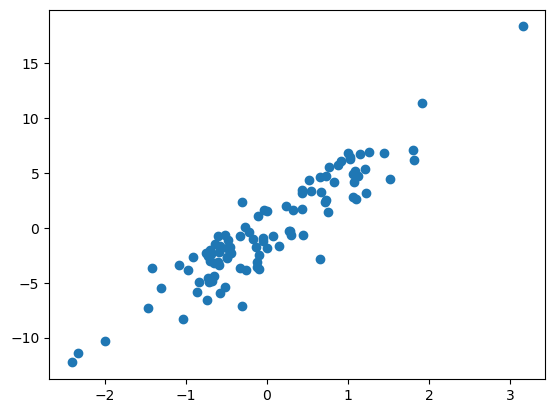

In [4]:
#plot the data

plt.scatter(x, y)

Always, always, look at the data!

## Correlations and scatterplots with real data

Let's start with the GapMinder data:

In [ ]:
df = pd.read_csv('./data/gapminder.tsv', sep = '\t')
df.head(4)

In [ ]:
data_2007 = df[df['year'] == 2007].dropna()

What was the relationship between life expectancy and GDP in 2007?

In [ ]:
plt.scatter(data_2007['lifeExp'], data_2007['gdpPercap'])
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per capita')
plt.show()

In [ ]:
np.corrcoef(data_2007['lifeExp'], data_2007['gdpPercap'])

Does this look like a linear relationship? Could we transform the data to make it more linear?

In [ ]:
data_2007['log_lifeExp']  = np.log10(data_2007['lifeExp'])
data_2007['log_gdpPercap'] = np.log10(data_2007['gdpPercap'])

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(life_exp_2, data_2007['log_gdpPercap'])
plt.xlabel('$\log_{10}$ Life Expectancy', fontsize=14)
plt.ylabel('$\log_{10}$ GDP per capita', fontsize=14)
plt.show()

In [ ]:
np.corrcoef(data_2007['log_lifeExp'], data_2007['log_gdpPercap'])

## Matrices of scatterplots and correlations

While they are obviously useful for exploring the relationship between two variables, what can we do if we have more than two variables?  At this point, things can become a little more complicated.  We are in fact constrained by living in a 3-d world where we often present information on a 2-d screen.  

Let's try to visualize all three numerical (untransformed) variables in this data - population, life expectancy, and GDP.

As long as the number of variables is still relatively small, you might be able to look at scatter plots of all pairwise combinations of the variables.  The seaborn library has a function for this purpose, called a 'pairplot'.

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data_2007[['lifeExp','pop','gdpPercap']])
plt.show()

Let's look at the correlation coefficients for all pairs of numeric variables including the log transformed variables:

In [ ]:
cols = ['lifeExp', 'pop', 'gdpPercap', 'log_lifeExp', 'log_gdpPercap']
corr_matrix = np.corrcoef(data_2007[cols], rowvar=False) #indicate that each col is a variable

In [ ]:
corr_matrix

In [ ]:
#We could also do it this way - what's different???


We can use either to create a heatmap to visualize the correlations and their strength. It is a good idea to create a scatterplot to verify pairwise correlations for variables of interest.

<b>Do NOT use a heatmap to determine what is more correlated with what unless it is all you are given (e.g. in a HW question) - if you have the data, calculate the full matrix and use that. The heatmap values are rounded.<b>

In [ ]:
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
            annot=True, fmt='.2f', xticklabels=cols, yticklabels=cols)
plt.show()

Let's see if we can clean this up:

In [ ]:

mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
            annot=True, fmt='.2f', xticklabels=cols[:-1], yticklabels=['']+cols[1:],
           mask = mask)
plt.tick_params(size = 0, labelsize = 12)
plt.xticks(rotation = 90)
plt.show()